In [1]:
!git clone https://github.com/facebookresearch/EasyComDataset.git



Cloning into 'EasyComDataset'...
remote: Enumerating objects: 3388, done.
remote: Counting objects: 100% (3388/3388), done.
remote: Compressing objects: 100% (3370/3370), done.
remote: Total 3388 (delta 23), reused 3375 (delta 12), pack-reused 0
Receiving objects: 100% (3388/3388), 11.52 MiB | 29.95 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Filtering content: 100% (3274/3274), 78.20 GiB | 114.17 MiB/s, done.


In [2]:
!apt update
!apt install ffmpeg


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [61.3 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.7 kB]
Get:13 http://security.ubuntu.com/ubuntu jamm

In [3]:
!ffmpeg -i '/content/EasyComDataset/Main/Close_Microphone_Audio/Session_6/01-00-282_Participant_ID_4.wav'


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [4]:
import os

# Define the path to a sample session in the dataset
sample_session_path = '/content/EasyComDataset/Main/Close_Microphone_Audio/Session_6'

# List all files in the sample session directory
session_files = os.listdir(sample_session_path)
print(session_files)


['11-00-421_Participant_ID_4.wav', '28-00-648_Participant_ID_4.wav', '02-00-327_Participant_ID_6.wav', '10-00-414_Participant_ID_6.wav', '29-00-649_Participant_ID_6.wav', '11-00-421_Participant_ID_6.wav', '23-00-573_Participant_ID_4.wav', '18-00-507_Participant_ID_4.wav', '17-00-489_Participant_ID_4.wav', '00-00-000_Participant_ID_4.wav', '09-00-402_Participant_ID_4.wav', '08-00-378_Participant_ID_6.wav', '25-00-594_Participant_ID_4.wav', '03-00-327_Participant_ID_6.wav', '05-00-364_Participant_ID_6.wav', '06-00-370_Participant_ID_6.wav', '09-00-402_Participant_ID_6.wav', '01-00-282_Participant_ID_6.wav', '28-00-648_Participant_ID_6.wav', '10-00-414_Participant_ID_4.wav', '13-00-463_Participant_ID_6.wav', '14-00-452_Participant_ID_6.wav', '27-00-644_Participant_ID_4.wav', '07-00-378_Participant_ID_4.wav', '07-00-378_Participant_ID_6.wav', '21-00-551_Participant_ID_4.wav', '20-00-540_Participant_ID_6.wav', '26-00-615_Participant_ID_4.wav', '22-00-562_Participant_ID_4.wav', '18-00-507_Pa

In [5]:
import subprocess
import librosa  # Import librosa for audio processing
import os       # Import os for file operations

def convert_audio_with_ffmpeg(input_path, output_path):
    # Command to convert audio to a compatible format using FFmpeg
    command = ['ffmpeg', '-i', input_path, '-acodec', 'pcm_s16le', '-ar', '44100', output_path]
    subprocess.run(command, check=True)

def load_audio_ffmpeg(audio_path):
    try:
        # Try to load with librosa first
        audio_data, sr = librosa.load(audio_path, sr=None)
    except Exception as e:
        print(f"Failed to load with librosa due to: {e}")
        # Convert to WAV using FFmpeg and retry
        temp_path = audio_path.replace('.wav', '_temp.wav')
        convert_audio_with_ffmpeg(audio_path, temp_path)
        audio_data, sr = librosa.load(temp_path, sr=None)
        os.remove(temp_path)  # Clean up temporary file
    return audio_data, sr

# Path to the original audio file
audio_path = '/content/EasyComDataset/Main/Close_Microphone_Audio/Session_6/01-00-282_Participant_ID_4.wav'

# Load the audio file using the FFmpeg conversion fallback
audio_data, sampling_rate = load_audio_ffmpeg(audio_path)


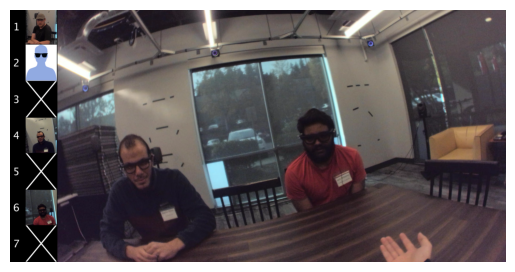

In [6]:
import cv2
import matplotlib.pyplot as plt

video_path = '/content/EasyComDataset/Main/Video_Compressed/Session_6/01-00-282.mp4'

# Create a video capture object
cap = cv2.VideoCapture(video_path)

# Read the first frame
success, frame = cap.read()

if success:
    # Convert from BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

# Release the video capture object
cap.release()


In [7]:
import json

json_path = '/content/EasyComDataset/Main/Head_Bounding_Boxes/Session_6/01-00-282.json'

# Load the JSON data
with open(json_path, 'r') as file:
    data = json.load(file)

# Now `data` contains your JSON data and you can access it like a Python dictionary
print(data)


[{'Frame_Number': 0, 'Participants': [{'Participant_ID': 4, 'x1': 463, 'y1': 546, 'x2': 617, 'y2': 766}, {'Participant_ID': 6, 'x1': 1241, 'y1': 450, 'x2': 1387, 'y2': 650}]}, {'Frame_Number': 1, 'Participants': [{'Participant_ID': 4, 'x1': 453, 'y1': 558, 'x2': 611, 'y2': 778}, {'Participant_ID': 6, 'x1': 1221, 'y1': 448, 'x2': 1385, 'y2': 652}]}, {'Frame_Number': 2, 'Participants': [{'Participant_ID': 4, 'x1': 505, 'y1': 564, 'x2': 659, 'y2': 768}, {'Participant_ID': 6, 'x1': 1271, 'y1': 440, 'x2': 1435, 'y2': 643}]}, {'Frame_Number': 3, 'Participants': [{'Participant_ID': 4, 'x1': 529, 'y1': 544, 'x2': 689, 'y2': 762}, {'Participant_ID': 6, 'x1': 1309, 'y1': 438, 'x2': 1469, 'y2': 640}]}, {'Frame_Number': 4, 'Participants': [{'Participant_ID': 6, 'x1': 1331, 'y1': 434, 'x2': 1485, 'y2': 632}, {'Participant_ID': 4, 'x1': 547, 'y1': 534, 'x2': 705, 'y2': 754}]}, {'Frame_Number': 5, 'Participants': [{'Participant_ID': 4, 'x1': 527, 'y1': 530, 'x2': 685, 'y2': 745}, {'Participant_ID': 6

In [13]:
import json
from transformers import pipeline

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

def load_transcriptions_json(path):
    """Load JSON data from a transcription file."""
    with open(path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

def analyze_conversation_quality(transcriptions):
    """Analyze and score the conversation quality based on NLP metrics."""
    results = []
    for entry in transcriptions:
        text = entry['Transcription']
        sentiment_result = sentiment_analyzer(text)  # Sentiment analysis for each transcription
        results.append({
            'Participant_ID': entry['Participant_ID'],
            'Transcription': text,
            'Sentiment': sentiment_result[0]['label'],  # Assuming use of a binary sentiment model
            'Confidence': sentiment_result[0]['score']
        })
    return results

# Path to the JSON transcription file
transcription_path = '/content/EasyComDataset/Main/Speech_Transcriptions/Session_6/01-00-282.json'  # Update this path with the actual path to your JSON file

# Load and analyze transcriptions
transcriptions = load_transcriptions_json(transcription_path)
conversation_quality_scores = analyze_conversation_quality(transcriptions)

# Output the results
for score in conversation_quality_scores:
    print(score)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'Participant_ID': 2, 'Transcription': '[X] steel kind of stuff.', 'Sentiment': 'POSITIVE', 'Confidence': 0.9115163087844849}
{'Participant_ID': 6, 'Transcription': "Does your company just take in like [H] homes as projects or like- When you say garment, I assume it's [U]", 'Sentiment': 'NEGATIVE', 'Confidence': 0.9958264231681824}
{'Participant_ID': 2, 'Transcription': "No, we- we don't- Yeah, we- we do less about personal homes, you know? We do more about those, y'know, commercial buildings, plazas, the highrise. Y'know, some of those you see at downtown, they're probably coming from our company.", 'Sentiment': 'NEGATIVE', 'Confidence': 0.9972409009933472}
{'Participant_ID': 6, 'Transcription': 'Yeah.', 'Sentiment': 'POSITIVE', 'Confidence': 0.9995235204696655}
{'Participant_ID': 6, 'Transcription': "Yeah. Tha- that's true.", 'Sentiment': 'POSITIVE', 'Confidence': 0.9997950196266174}
{'Participant_ID': 2, 'Transcription': 'Yeah. What about you, Sophie?', 'Sentiment': 'POSITIVE', 'Con

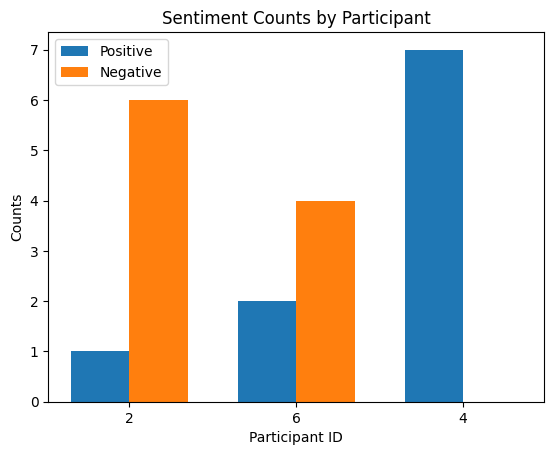

In [15]:
import matplotlib.pyplot as plt

# Sample data from your sentiment analysis output
results = [
    {'Participant_ID': 2, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 6, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 2, 'Sentiment': 'POSITIVE'},
    {'Participant_ID': 6, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 6, 'Sentiment': 'POSITIVE'},
    {'Participant_ID': 2, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 4, 'Sentiment': 'POSITIVE'},
    {'Participant_ID': 6, 'Sentiment': 'POSITIVE'},
    {'Participant_ID': 4, 'Sentiment': 'POSITIVE'},
    {'Participant_ID': 2, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 6, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 2, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 4, 'Sentiment': 'POSITIVE'},
    {'Participant_ID': 2, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 6, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 4, 'Sentiment': 'POSITIVE'},
    {'Participant_ID': 4, 'Sentiment': 'POSITIVE'},
    {'Participant_ID': 2, 'Sentiment': 'NEGATIVE'},
    {'Participant_ID': 4, 'Sentiment': 'POSITIVE'},
    {'Participant_ID': 4, 'Sentiment': 'POSITIVE'}
]

# Organize data by participant
sentiment_counts = {}
for result in results:
    participant = result['Participant_ID']
    sentiment = result['Sentiment']
    if participant not in sentiment_counts:
        sentiment_counts[participant] = {'POSITIVE': 0, 'NEGATIVE': 0}
    sentiment_counts[participant][sentiment] += 1

# Prepare data for plotting
participants = list(sentiment_counts.keys())
positive_counts = [sentiment_counts[participant]['POSITIVE'] for participant in participants]
negative_counts = [sentiment_counts[participant]['NEGATIVE'] for participant in participants]

# Create a bar chart
fig, ax = plt.subplots()
index = range(len(participants))
bar_width = 0.35

bar1 = ax.bar(index, positive_counts, bar_width, label='Positive')
bar2 = ax.bar([p + bar_width for p in index], negative_counts, bar_width, label='Negative')

ax.set_xlabel('Participant ID')
ax.set_ylabel('Counts')
ax.set_title('Sentiment Counts by Participant')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(participants)
ax.legend()

# Show the plot
plt.show()


Python Code for Interaction Analysis:

In [17]:
import json

def load_interactions(path):
    """Load transcription data and analyze interactions."""
    with open(path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    interactions = {}
    for entry in data:
        speaker = entry['Participant_ID']
        targets = entry['Target_of_Speech']
        if speaker not in interactions:
            interactions[speaker] = {}

        for target in targets:
            if target not in interactions[speaker]:
                interactions[speaker][target] = 0
            interactions[speaker][target] += 1

    return interactions

# Path to your JSON transcription file
transcription_path = '/content/EasyComDataset/Main/Speech_Transcriptions/Session_6/01-00-282.json'
interaction_data = load_interactions(transcription_path)
print(interaction_data)


{2: {'Group': 3, 4: 4, 'None': 1}, 6: {2: 3, 4: 4}, 4: {'Group': 5, 6: 1, 'None': 1}}


Python Code for Contextual Sentiment Analysis:

In [18]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

def contextual_sentiment_analysis(model_name, path):
    """Load transcriptions and analyze sentiment with a contextual model."""
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    with open(path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    results = []
    for entry in data:
        transcript = entry['Transcription']
        inputs = tokenizer(transcript, return_tensors='pt', truncation=True, max_length=512)
        outputs = model(**inputs)
        sentiment = outputs.logits.argmax(-1).item()  # Assuming binary classification
        results.append({'Participant_ID': entry['Participant_ID'], 'Sentiment': 'POSITIVE' if sentiment == 1 else 'NEGATIVE'})

    return results

# Example model and path
model_name = 'bert-base-uncased'
transcription_path = '/content/EasyComDataset/Main/Speech_Transcriptions/Session_6/01-00-282.json'
sentiment_results = contextual_sentiment_analysis(model_name, transcription_path)
print(sentiment_results)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'Participant_ID': 2, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 6, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 2, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 6, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 6, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 2, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 4, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 6, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 4, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 2, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 6, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 2, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 4, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 2, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 6, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 4, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 4, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 2, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 6, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 4, 'Sentiment': 'POSITIVE'}, {'Participant_ID': 2, 'Sentiment': 'POS

Python Code for Network Graph Visualization

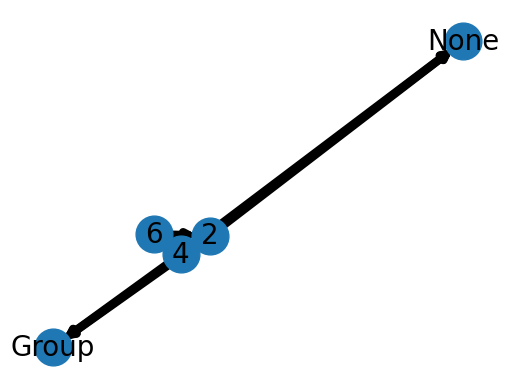

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_interaction_network(interactions):
    """Plot a network graph of interactions."""
    G = nx.DiGraph()
    for speaker, targets in interactions.items():
        for target, count in targets.items():
            G.add_edge(speaker, target, weight=count)

    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, width=6)
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.axis('off')
    plt.show()

# Assuming interaction_data is available
plot_interaction_network(interaction_data)
